In [18]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import binom
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import beta
from functools import partial
np.random.seed(1234)

In [19]:
def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:# this is conditions for theta, theta must be between 0 and 1 because it's a probability
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta)

In [20]:
def mh_coin(niters, n, h, theta, lik, prior, sigma):# metropolis hastings for the coin example, the likelihood is a binomial distribution
    # h is number of heads. theta is the probability of getting head
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples# samples is my A in mycode

In [30]:
n = 100# this is the sample size
h = 61
theta=0.5
lik = binom
prior = beta(10,10)
sigma = 0.05# this is the stepsize
niters = 100# this is mcmmc sampler size
sampless = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]# basically this says run the MCMC 
#5 times
# you can use linspace instead np.arange

print(len(sampless))
#sampless
#okay, so you have 5 vectors, each of length 100, starting at 0.1, then at 0.3,0.5,0.7,0.9

5


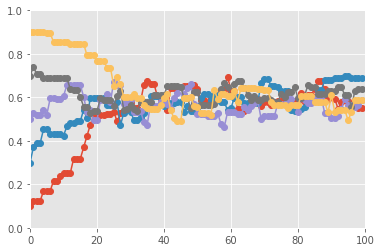

In [22]:
# Convergence of multiple chains

for samples in sampless:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 1]);